# 라이브러리 로드

In [65]:
!pip install lda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import nltk
import re
import collections
import itertools
import lda
import requests
import csv
import time
import math
import operator
import numpy as np
import pandas as pd
from collections import defaultdict
from pandas import read_table
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score    # 정확도 계산

In [68]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

In [69]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [70]:
from konlpy.tag import Okt
import nltk

In [71]:
from IPython.core.display import DisplayObject
DisplayObject

IPython.core.display.DisplayObject

In [72]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
okt=Okt()

# 불용어 불러오기

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# 불용어 리스트 불러오기
stopword = pd.read_csv('/content/drive/MyDrive/stop_words_fin.csv', encoding='utf-8',header=None)

# 불용어 리스트화
stopword = stopword[0].to_list()

stopword[:10]

['0', '않다', '되어다', '되다', '하다', '어떻다', '이렇다', '이다', '어제', '매일']

# 분류목록 생성

In [12]:
ps_app = [ '좋아요',
'굿',
'넷플릭스',
'좋은데',
'앱',
'최고',
'좋음',
'좋습니다',
'좋은',
'굳',
'넷플',
'좋네요',
'짱',
'많은',
'추천',
'좋다',
'별로',
'많아요',
'서비스',
'많고',
'개선',
'조아요',
'아쉽네요',
'좋아용',
'굿굿',
'왓챠',
'만족',
'대박',
'빠른',
'디즈니',
'만족합니다',
'아쉬운',
'단점',
'구글',
'좋긴',
'감사',
'많네요',
'유튜브',
'짱짱',
'센터',
'좋지만',
'많아',
'플레이',
'넥플릭스',
'로고',
'즐겨',
'좋겠음',
'많음',
'생겼으면',
'개꿀',
'정상',
'평가',
'괜찮은데',
'좋와',
'빠르게',
'문의',
'쵝오',
'평점',
'적용',
'도움',
'출시',
'와우',
'굿굿굿',
'아쉽습니다',
'유용하게',
'사라져서',
'앞뒤',
'기분',
'강추',
'늦게',
'즐겁게',
'괜찮아요',
'좋았습니다',
'좋아하는데',
'갓플릭스',
'젠',
'불만',
'아쉬움',
'애용',
'기대',
'통합',
'플랫폼',
'전혀',
'진행',
'괜찮은',
'늘려주세요',
'굿잡',
'힘들어요',
'만족스럽습니다',
'좋게',
'안될',
'쉽고',
'좋겠어용',
'필요한',
'좋구요',
'꿀',
'장점',
'기본',
'편의',
'플러스',
'후회',
'여가',
'좋아해서',
'네플릭스',
'화이팅',
'아쉽',
'감사해요',
'조음',
'진정',
'최고다',
'부족한',
'이상하게',
'잘못',
'관심',
'카톡',
'중인',
'네이버',
'오른쪽',
'실망',
'좋을듯',
'느려요',
'엡',
'감동',
'유익하고',
'기다려야',
'최대',
'없어져서',
'부족해요',
'사라질',
'관리',
'안된다는',
'기만',
'필요없음',
'만점',
'꾸준히',
'비슷한',
'짜증나네요',
'괜찮네요',
'없어졌네요',
'빠르고',
'안나옵니다',
'적어요',
'완벽할',
'없어졌나요',
'좋네',
'괜찮음',
'나이스',
'웨이브',
'티빙',
'사라지는',
'공지',
'야하는',
'부족',
'젤',
'경험',
'바꿔주세요',
'짜증나요',
'피드백',
'적은',
'결과',
'적극',
'가치',
'인지',
'버려서',
'완벽',
'유용한',
'똥',
'칭찬',
'잘쓰고있습니다',
'원합니다',
'무지',
'아쉽다',
'만족해요',
'필요없다',
'멋진',
'조아여',
'즐길',
'최소',
'답답해요',
'중요한',
'다르게',
'스토어',
'충분히',
'후기',
'많지',
'만족하며',
'없어지는',
'활용',
'전반',
'최대한',
'순위',
'아닌거',
'나쁘지',
'적다',
'유투브',
'없어지고',
'다른거',
'공식',
'유익한',
'많지만',
'많아져서',
'가능합니다',
'유용합니다',
'들어주세요',
'구글플레이',
'유용해요',
'번창',
'됐네요',
'이상한거',
'넥플',
'투자',
'괜찮습니다',
'살려주세요',
'찐',
'불평',
'즐길수',
'고마워요',
'기다리고',
'좋은대',
'많네',
'희망',
'좋어요',
'문제점'
]

In [13]:
ps_function = ['화면',
'영상',
'기능',
'사용',
'재생',
'업데이트',
'화질',
'설정',
'폰',
'오류',
'배속',
'문제',
'어플',
'모바일',
'삭제',
'지원',
'조절',
'해결',
'검색',
'인증',
'티비',
'실행',
'로그인',
'접속',
'설치',
'소리',
'핸드폰',
'모드',
'다운',
'갤럭시',
'속도',
'터치',
'밝기',
'버튼',
'업뎃',
'로딩',
'다운로드',
'크기',
'창',
'정지',
'모자이크',
'휴대폰',
'안됩니다',
'태블릿',
'불편합니다',
'안드로이드',
'불편해요',
'광고',
'버그',
'버전',
'와이파이',
'폰트',
'멀티',
'카테고리',
'프로필',
'컴퓨터',
'발생',
'분할',
'불편하네요',
'고화질',
'렉',
'이중',
'조정',
'데이터',
'스마트폰',
'연결',
'편리하고',
'탭',
'인터넷',
'갤럭시탭',
'윈도우',
'인터페이스',
'고쳐주시면',
'음성',
'편해요',
'스트리밍',
'싱크',
'크롬캐스트',
'불편한',
'댓글',
'팝업창',
'멈추고',
'불편',
'건의',
'다중',
'글자',
'클릭',
'환경',
'재부팅',
'제한',
'스킵',
'스크린',
'연령',
'삼성',
'패드',
'배터리',
'아이패드',
'편함',
'퀄리티',
'수단',
'반복',
'알림',
'옵션',
'로그아웃',
'껐다',
'디바이스',
'사이트',
'테블릿',
'넘어갈',
'아이폰',
'오디오',
'저화질',
'비율',
'지웠다가',
'지웠다',
'날짜',
'강제',
'캡쳐',
'지하철',
'지우고',
'업그레이드',
'덱스',
'작게',
'불편함이',
'서버',
'먹통',
'스마트',
'볼륨',
'버퍼링',
'불편함',
'구분',
'개발자',
'됐어요',
'크롬',
'랙',
'패치',
'사양',
'배경',
'바꾸면',
'글씨',
'편리한',
'편리하게',
'오류로',
'채팅',
'해킹',
'없애고',
'글꼴',
'정렬',
'세분',
'제도',
'간편하고',
'오프라인',
'튕겨',
'나이',
'필터',
'구간',
'듀얼',
'멈추는',
'전원',
'꺼짐',
'넘기는',
'전화',
'걸려요',
'홈페이지',
'하자',
'제외',
'하단',
'깔았는데도',
'바꾸고',
'블랙베리',
'넘기기',
'청각장애',
'나오더라고요',
'대문자',
'좌우',
'편리해요',
'개조',
'편하다',
'필요한가',
'하나로',
'불편하고'
]

In [14]:
ps_contents = ['영화',
'자막',
'드라마',
'컨텐츠',
'애니',
'시즌',
'시청',
'영어',
'콘텐츠',
'한국',
'시리즈',
'다양한',
'작품',
'한글',
'프로그램',
'미드',
'해리포터',
'한국어',
'정도',
'재밌어요',
'사랑',
'애니메이션',
'예능',
'칼날',
'하이큐',
'노트',
'게임',
'무한',
'재미있게',
'재밌게',
'재미있어요',
'만화',
'성인',
'꿀잼',
'더빙',
'동영상',
'새로운',
'장르',
'집',
'볼거리',
'극장판',
'공개',
'언어',
'귀멸',
'주술',
'원피스',
'최신영',
'재밌고',
'열차',
'감기',
'친구',
'아카데미',
'히어로',
'인기',
'코로나',
'진격',
'오징어',
'블랙',
'잼',
'일본',
'짱구',
'해외',
'외국',
'마음',
'다양하게',
'미국',
'태양',
'예정',
'다양해서',
'나루토',
'가족',
'거인',
'클로버',
'국내',
'다양하고',
'엄마',
'코난',
'후예',
'내용',
'신작',
'이야기',
'인생',
'포켓몬스터',
'프리',
'호텔',
'킹덤',
'우리나라',
'강림',
'재미있고',
'파라',
'아파트',
'재밌음',
'도깨비',
'제작',
'취향',
'한영',
'재밌다',
'어린이',
'런닝맨',
'재미있다',
'노트북',
'중드',
'루나',
'탈출',
'봉',
'에피소드',
'올려주시면',
'펜트하우스',
'중국',
'신비',
'델',
'밥',
'국가',
'재밌는거',
'학교',
'아빠',
'이루마',
'만화가',
'전생',
'마블',
'소문',
'명작',
'재미있음',
'화보',
'생활',
'방송',
'겨울왕국',
'재미있습니다',
'업',
'재밌는데',
'포켓몬',
'닥터',
'모험',
'배우',
'시청자',
'왕좌',
'종이',
'밤',
'재미나',
'추억',
'응답',
'세상',
'경이',
'칼',
'명탐정',
'구미호',
'기묘한',
'도라에몽',
'영화관',
'재밌어',
'화랑',
'행복',
'조작',
'사진',
'개봉',
'타임',
'법',
'시대',
'보고싶어서',
'한국영',
'재미있는게',
'일본애니',
'다양',
'보이스',
'한국인',
'타이타닉',
'재미있어서',
'재밌네요',
'전설',
'신세계',
'세계',
'키즈',
'이상한',
'신규',
'스위트홈',
'엔딩',
'쇼',
'워킹데드',
'바다',
'간',
'페어리테일',
'일곱개',
'대죄',
'킹',
'스타',
'라임',
'콜',
'리즈',
'토피아',
'영드',
'재밋',
'그레이',
'재난',
'문호',
'쌈',
'죠죠',
'꿈빛',
'어벤져스',
'트롤',
'낭만',
'하이킥',
'다양했으면',
'중독',
'소년',
'위대한',
'블리치',
'혈',
'잼나요',
'애니매이션',
'완결',
'저작권',
'판권',
'중국어',
'일본어',
'미디어',
'테츠',
'라이트',
'도둑',
'먹고',
'낙',
'곡',
'판이',
'맛',
'올려주세용',
'여신',
'재밌는게',
'토미',
'도쿄구울',
'잠',
'존잼',
'서유기',
'보고싶네요',
'캐릭',
'대만',
'공룡',
'직업',
'마이웨이',
'하트',
'보루',
'검볼',
'산다',
'중국드라마',
'사부',
'일기',
'하우스',
'역도',
'요정',
'복주',
'제이크',
'선생님',
'보고싶다',
'생일',
'잼나게',
'루머',
'여우',
'데어데블',
'장공',
'맨',
'원본',
'어른',
'편이',
'모던패밀리',
'지정',
'칸',
'제작자',
'흥미',
'풍부한',
'그림자',
'블러',
'국산',
'좀비',
'편도',
'존재',
'몰입도',
'다큐',
'메이',
'꽃',
'잔인한',
'개는',
'대하',
'컨탠츠',
'볼수있는게',
'조커',
'명탐정코난',
'스트레이독스',
'푸른',
'슈가슈가룬',
'핀',
'헌터',
'혜자',
'신',
'셜록',
'유혹',
'리틀',
'한드',
'페이트',
'빅토리어스',
'닥터스',
'시엘',
'최애',
'보스',
'재밌있어요',
'재밌습니다',
'재밋어',
'왕',
'고질라',
'옥자',
'몰입',
'음악',
'팬',
'소원',
'모델'
]

In [15]:
ps_payment = ['결제',
'무료',
'이용',
'돈',
'가입',
'계정',
'가격',
'해지',
'자동',
'사용자',
'카드',
'구독',
'유료',
'환불',
'고객',
'프리미엄',
'정액',
'기간',
'공짜',
'체험',
'요금',
'내고',
'결재',
'멤버십',
'회원',
'계약',
'구매',
'이용자',
'이메일',
'비번',
'만원',
'저가',
'이용권',
'비싼',
'값',
'무제한',
'탈퇴',
'스탠다드',
'금액',
'체크',
'아이디',
'비싸지만',
'신용카드',
'안아까'
]

In [16]:
ng_app = ['넷플릭스',
'어플',
'좋은데',
'서비스',
'넷플',
'센터',
'빠른',
'별로',
'로고',
'왓챠',
'관리',
'문의',
'지원',
'최악',
'쓰레기',
'플레이',
'볼수가',
'구글',
'전혀',
'많은',
'유튜브',
'먹통',
'젠',
'좋겠네요',
'짜증나네요',
'실망',
'많고',
'추천',
'많아요',
'짜증',
'좋은',
'보상',
'상황',
'많네요',
'좋아요',
'넣어주세요',
'진행',
'공지',
'짜증나요',
'짜증나서',
'표시',
'댓글',
'사라짐',
'많음',
'기분',
'피드백',
'개판',
'스트레스',
'평가',
'디즈니',
'잘못',
'아쉽네요',
'엉망',
'당황',
'플러스',
'사라지는',
'똑바로',
'구려',
'답답하네요',
'구글플레이',
'빠르게',
'짜증납니다',
'짜증나네',
'웨이브',
'플랫폼',
'없어지고',
'최고',
'괜찮은데',
'짜증나게',
'문제점',
'짜증남',
'심하네요',
'사라져서',
'똑같아요',
'짜증나',
'넥플릭스',
'편의',
'기다려야',
'평점',
'버리고',
'좋지만',
'많아',
'적용',
'구림',
'사기',
'동의',
'기다려',
'횟수',
'심하고',
'사라지네요',
'늦게',
'좋긴',
'이상한',
'별하나',
'신고',
'좋습니다',
'구리',
'포기',
'버림',
'재시',
'이상하게',
'불만',
'부족',
'기만',
'없어져서',
'화나네요',
'대기',
'티빙',
'버리네요',
'힘들어요',
'무시',
'오른쪽',
'불가능',
'답답해요',
'굿',
'힘드네요',
'빡침',
'먹튀',
'아쉽습니다',
'딱히',
'아니라고',
'비슷한',
'많은거',
'일부러',
'너무하네요',
'빡치게',
'틀렸다고',
'스토어',
'안좋아요',
'인상',
'똥',
'더럽게',
'즐겨',
'장점',
'단점',
'심하게',
'중요한',
'지도',
'좋게',
'고해',
'의문',
'피해',
'돌려',
'싫어요',
'답답합니다',
'빡치네',
'사라질',
'눌러',
'빵빵',
'카톡',
'네이버',
'보고싶어도',
'답답해',
'끝나고',
'저절로',
'적어요',
'많다고',
'나가는데',
'용이',
'정작',
'심각하게',
'고려',
'고함',
'직원',
'모르겠다',
'좋음',
'오래된',
'실패',
'사라지게',
'안대',
'좋네요',
'왓차',
'플레이스토어',
'열리고',
'좋지',
'많지',
'긴',
'동일',
'관심',
'카카오',
'결론',
'구분',
'시대',
'유투브',
'멀쩡히',
'없어졌네요',
'이상해요',
'보지말라는',
'느리고',
'버려요',
'없는것도',
'보는거',
'돌려주세요',
'드럽게',
'안좋네요',
'후기',
'젤',
'차이',
'괜찮았는데',
'답답해서',
'다시는',
'빡쳐서',
'올려',
'넣어주시면',
'없어짐',
'미친',
'심각한',
'발견',
'떨어지네요',
'없어져요',
'비추',
'답답',
'화나서',
'적은',
'결과',
'존재',
'짱',
'너무한거',
'죽겠어요',
'느려요',
'사과',
'바뀐',
'버려서',
'당해서',
'좋아하는데',
'호구',
'내놔',
'늘려주세요'
]

In [17]:
ng_function = ['화면',
'앱',
'자막',
'오류',
'영상',
'재생',
'접속',
'업데이트',
'사용',
'실행',
'문제',
'해결',
'화질',
'인증',
'로그인',
'삭제',
'로딩',
'폰',
'소리',
'설치',
'시청',
'설정',
'개선',
'기능',
'핸드폰',
'갤럭시',
'다운',
'모바일',
'버튼',
'검색',
'렉',
'멈추고',
'연결',
'디바이스',
'조절',
'창',
'밝기',
'반복',
'터치',
'티비',
'다운로드',
'지웠다',
'정지',
'휴대폰',
'데이터',
'안드로이드',
'와이파이',
'배속',
'불편합니다',
'한국어',
'지우고',
'불편해요',
'껐다',
'업뎃',
'버그',
'모자이크',
'연령',
'인터넷',
'태블릿',
'로그아웃',
'폰트',
'불편하네요',
'버전',
'크기',
'고화질',
'속도',
'버퍼링',
'컴퓨터',
'모드',
'멈춤',
'음성',
'끊기고',
'언어',
'오류로',
'탭',
'전화',
'갤',
'강제',
'해킹',
'불편함',
'카테고리',
'불편',
'재부팅',
'사이트',
'정상',
'지웠다가',
'클릭',
'스트리밍',
'광고',
'저화질',
'스마트폰',
'넘어가질',
'서버',
'알림',
'조정',
'튕기',
'갤럭시탭',
'글자',
'들어가지지도',
'튕겨',
'삼성',
'홈페이지',
'끊겨요',
'고치',
'멈춰',
'글씨',
'들어가지네요',
'싱크',
'제한',
'껐다가',
'개발자',
'테블릿',
'배경',
'스마트',
'멀티',
'네트워크',
'꺼짐',
'문구',
'깔았는데도',
'꺼져요',
'인터페이스',
'호환',
'넘어가요',
'켜야',
'팝업창',
'수단',
'바꾸고',
'배터리',
'업그레이드',
'불편한',
'프로필',
'들리고',
'통화',
'나가고',
'아이폰',
'깔아서',
'패드',
'넘어가지',
'전원',
'어두워서',
'검정색',
'검열',
'패치',
'걸려요',
'채팅',
'꺼집니다',
'환경',
'오디오',
'하자',
'해상도',
'난리',
'크롬캐스트',
'불편하고',
'깨지고',
'깨져서',
'까만',
'용량',
'걸림',
'분할',
'멈춥니다',
'바탕',
'웹',
'파일',
'아이패드',
'이중',
'필터',
'사항',
'끊기네요',
'튕김',
'사양',
'걸리네요',
'멈추는',
'켜면',
'어둡게',
'멈추네요',
'작게',
'베타',
'열림',
'미성년',
'폴드',
'표기',
'나이',
'소프트웨어',
'멈춘',
'스크린',
'옵션',
'끊기는',
'고치세요',
'고쳐주셨으면',
'갤탭',
'보안',
'단계',
'기술',
'중단',
'윈도우',
'정원',
'방해',
'앞뒤',
'꺼져',
'멈춰있어요',
'불법',
'튕기네',
'구간',
'듀얼',
'불편해서',
'점검',
'오프라인',
'느림',
'하단',
'켜지지도',
'중복',
'비율',
'불편하게',
'고쳐주시면',
'컨트롤',
'글씨체',
'업뎃후',
'랙',
'넘어갈',
'고쳐줘요',
'등급',
'들리는데',
'메시지',
'공식',
'버젼',
'실시간',
'불량',
'링크',
'버퍼',
'청소년',
'막아',
'볼륨',
'멈춰있고',
'버벅',
'지웟다',
'차단',
'끊깁니다',
'컴터',
'소모',
'켜짐',
'고쳐주시길',
'덱스',
'락',
'넘어가네요',
'멈추거나',
'심합니다',
'바꿔주세요',
'넘어가는',
'꺼지는',
'바뀜',
'글꼴',
'들어가지도',
'발열',
'켜지네요',
'열리지도',
'화면비율',
'연결하면',
'사운드',
'최적화',
'들려요',
'넘기',
'작아서',
'지워도',
'누르고',
'넘어가는데',
'켜지고',
'크롬',
'지웠는데',
'들어가지나요',
'깨짐',
'넘기기',
'깔려고',
'팅기고',
'들어가질',
'깔았더니',
'업뎃이후'
]

In [18]:
ng_contents = ['영화',
'드라마',
'컨텐츠',
'성인',
'무한',
'한국',
'동영상',
'시즌',
'정도',
'애니',
'영어',
'콘텐츠',
'한글',
'작품',
'시리즈',
'미드',
'프로그램',
'미국',
'해외',
'외국',
'예능',
'애니메이션',
'일본',
'킹덤',
'먹고',
'내용',
'집',
'해리포터',
'더빙',
'일본어',
'노트북',
'다양한',
'장르',
'게임',
'공개',
'새로운',
'마음',
'예정',
'감기',
'인기',
'하이큐',
'친구',
'블랙',
'쇼',
'밤',
'국가',
'청불',
'책',
'세계',
'재밌게',
'모델',
'가족',
'법',
'만화',
'진격',
'스페인어',
'최신영',
'방송',
'마블',
'차별',
'조작',
'이야기',
'우리나라',
'엄마',
'제작',
'캐시',
'에피소드',
'칼날',
'영문',
'명작',
'극장판',
'오역',
'지역',
'국내',
'칼',
'몰입',
'퀄리티',
'비디오',
'의역',
'신작',
'예고편',
'간',
'보고싶어서',
'업',
'노잼',
'기억',
'신규',
'라이트',
'제작자',
'워킹데드',
'주술',
'화보',
'응답',
'아카데미',
'빅뱅이론',
'포스터',
'다양하게',
'블루',
'몰입도',
'중국',
'미러',
'종이',
'칸',
'야함',
'거인',
'볼거리',
'원피스',
'런닝맨',
'실화',
'히어로',
'시청자',
'사랑',
'야해요',
'쿠키',
'나루토',
'외국어'
]

In [19]:
ng_payment = ['결제',
'돈',
'무료',
'가입',
'환불',
'이용',
'해지',
'고객',
'자동',
'계정',
'카드',
'사용자',
'유료',
'구독',
'결재',
'회원',
'이메일',
'체험',
'요금',
'멤버십',
'프리미엄',
'가격',
'탈퇴',
'기간',
'비번',
'정액',
'기본',
'아이디',
'비싼',
'이용자',
'금액',
'공짜',
'아깝네요',
'구매',
'전화번호',
'지불',
'주소',
'날짜',
'만원',
'이용권',
'아까워요',
'비용',
'아까워',
'거지',
'계약',
'스탠다드',
'청구',
'신용카드',
'무제한',
'체크',
'베이직',
'맴버십',
'계좌',
'출금',
'페이',
'만료',
'매월',
'체크카드',
'아깝습니다',
'이용도',
'통신사',
'값',
'일인',
'갱신',
'싼',
'맴버쉽'
]

# 데이터 로드

In [20]:
df = pd.read_csv('/content/drive/MyDrive/net/net_2021_1q.csv')
df

,Unnamed: 0,Unnamed: 0.1,userName,content,score,thumbsUpCount,at,quarter,year
0,10423,10423,wnsqo wh,다 좋은데 일본 애니메이션 추가 좀 해주세요,4,0,2021-01-01 00:09:17,2021/1Q,2021
1,14161,14161,전귀한,신작영화가 없네요,1,1,2021-01-01 01:41:07,2021/1Q,2021
2,12382,12382,백정수,넷플릭스를 보기시작하구는 티비와 멀어지네요,4,0,2021-01-01 02:15:23,2021/1Q,2021
3,11925,11925,김서현,보고싶은 영화나 만화 문의 할 수 있게 해주세요^^~~,5,0,2021-01-01 02:38:11,2021/1Q,2021
4,18061,18061,호우준,ㅇ아애,5,0,2021-01-01 03:13:17,2021/1Q,2021
...,...,...,...,...,...,...,...,...,...
2004,4201,4201,MUtube feat. JK,"노트10+ 실행했는데, 오류5.7 뜨면서 껏다 키라는 추천대로 껏다 키기를 5번째 ...",1,1,2021-03-31 21:26:15,2021/1Q,2021
2005,15899,15899,최지선,아니왜이거 안깔아지죠?,1,0,2021-03-31 22:10:57,2021/1Q,2021
2006,11632,11632,Start Kim,티비 연결시 자막좀 여러개 나왔음 좋겠어요,3,0,2021-03-31 22:12:38,2021/1Q,2021
2007,2882,2882,이정환,모바일에서도 잘나오고 tv로 볼땐 4k까지 지원되는 영화나 드라마가있어 고화질 시청...,5,3,2021-03-31 22:18:36,2021/1Q,2021


In [21]:
df = df.dropna()

# 리뷰 전체를 한 문자열로 통합

In [22]:
# 리뷰들을 모두 한 문자열로 통합
reviews = ''
   
for i in df['content'] : 
  reviews = reviews + i + '\n'

In [23]:
from collections import defaultdict
from pandas import read_table
import numpy as np
import math

class NaiveBayesClassifier:

    def __init__(self, k=0.5):
        self.k = k
        self.word_probs = []

    def load_corpus(self, path):
        corpus = read_table(path, sep=',', encoding='utf-8')
        corpus = np.array(corpus)
        return corpus

    def count_words(self, training_set):
        # 학습데이터는 영화리뷰 본문(doc), 평점(point)으로 구성

        counts = defaultdict(lambda : [0, 0])
        for doc, point in training_set:
            # 영화리뷰가 text일 때만 카운트
            if self.isNumber(doc) is False:
                  
                  words = okt.pos(doc)

                  ls = []
                  for i,j in words : 
                    if j == 'Noun' or j == 'Adjective' or j == 'Verb' :
                        ls.append(i)

                  ls2 = []
                  for i in ls :
                    if i not in stopword :
                      ls2.append(i)

                  for word in ls2:
                    counts[word][0 if point > 3.5 else 1] += 1
        
        return counts

    def isNumber(self, s):
        try:
            float(s)
            return True
        except ValueError:
            return False

    def word_probabilities(self, counts, total_class0, total_class1, k):
        # 단어의 빈도수를 [단어, p(w|긍정), p(w|부정)] 형태로 반환
        return [(w,
                 (class0 + k) / (total_class0 + 2*k),
                 (class1 + k) / (total_class1 + 2*k))
                for w, (class0, class1) in counts.items()]

    def class0_probability(self, word_probs, doc):
        # 별도 토크나이즈 안하고 띄어쓰기로만
        docwords = okt.pos(doc)

        ls = []
        for i,j in docwords : 
          if j == 'Noun' or j == 'Adjective' or j == 'Verb' :
              ls.append(i)

        ls2 = []
        for i in ls :
          if i not in stopword :
            ls2.append(i)

        docwords = ls2

        # 초기값은 모두 0으로 처리
        log_prob_if_class0 = log_prob_if_class1 = 0.0

        # 모든 단어에 대해 반복
        for word, prob_if_class0, prob_if_class1 in word_probs:
            # 만약 리뷰에 word가 나타나면
            # 해당 단어가 나올 log 확률을 더해 줌
            if word in docwords:
                log_prob_if_class0 += math.log(prob_if_class0)
                log_prob_if_class1 += math.log(prob_if_class1)

            # 만약 리뷰에 word가 나타나지 않는다면
            # 해당 단어가 나오지 않을 log 확률을 더해 줌
            # 나오지 않을 확률은 log(1-나올 확률)로 계산
            else:
                log_prob_if_class0 += math.log(1.0 - prob_if_class0)
                log_prob_if_class1 += math.log(1.0 - prob_if_class1)

        prob_if_class0 = math.exp(log_prob_if_class0)
        prob_if_class1 = math.exp(log_prob_if_class1)
        return prob_if_class0 / (prob_if_class0 + prob_if_class1)

    def train(self, trainfile_path):
        training_set = self.load_corpus(trainfile_path)

        # 범주0(긍정)과 범주1(부정) 문서 수를 세어 줌
        num_class0 = len([1 for _, point in training_set if point > 3.5])
        num_class1 = len(training_set) - num_class0

        # train
        word_counts = self.count_words(training_set)
        self.word_probs = self.word_probabilities(word_counts,
                                                  num_class0,
                                                  num_class1,
                                                  self.k)

    def classify(self, doc):
        return self.class0_probability(self.word_probs, doc)

In [24]:
df = df[['content', 'score']]

In [25]:
df.to_csv('filtered.csv',index=None,header=None)

In [26]:
model = NaiveBayesClassifier()
model.train(trainfile_path='filtered.csv')

In [27]:
# 긍정 단어 가중치로 딕셔너리 만들기
dict_p = {}
for i in model.word_probs:
    dict_p[i[0]] = i[1]
# 부정 단어 가중치로 딕셔너리 만들기    
dict_n = {}
for i in model.word_probs:
    dict_n[i[0]] = i[2]
# 각 딕셔너리 값을 내림차순 정렬
sort_dict_p = sorted(dict_p.items(), key=operator.itemgetter(1), reverse=True)
sort_dict_n = sorted(dict_n.items(), key=operator.itemgetter(1), reverse=True)

In [28]:
ps_app_dic = {}
for topic in ps_app:
    for word,value in dict_p.items():
        if(topic == word):
            ps_app_dic[word] = value
print(ps_app_dic)

{'좋아요': 0.1492467043314501, '굿': 0.07297551789077213, '넷플릭스': 0.0852165725047081, '좋은데': 0.059792843691148775, '앱': 0.03248587570621469, '최고': 0.025894538606403013, '좋음': 0.025894538606403013, '좋습니다': 0.012711864406779662, '좋은': 0.018361581920903956, '넷플': 0.011770244821092278, '좋네요': 0.02024482109227872, '짱': 0.009887005649717515, '많은': 0.01647834274952919, '추천': 0.011770244821092278, '좋다': 0.010828625235404897, '별로': 0.008945386064030132, '많아요': 0.00800376647834275, '서비스': 0.006120527306967985, '많고': 0.005178907721280603, '개선': 0.003295668549905838, '조아요': 0.005178907721280603, '아쉽네요': 0.009887005649717515, '좋아용': 0.009887005649717515, '굿굿': 0.00800376647834275, '왓챠': 0.005178907721280603, '만족': 0.005178907721280603, '대박': 0.00800376647834275, '빠른': 0.003295668549905838, '디즈니': 0.00800376647834275, '만족합니다': 0.003295668549905838, '아쉬운': 0.0014124293785310734, '단점': 0.00423728813559322, '구글': 0.006120527306967985, '좋긴': 0.00423728813559322, '감사': 0.006120527306967985, '많네요': 0.00329566

In [29]:
ps_function_dic = {}
for topic in ps_function:
    for word,value in dict_p.items():
        if(topic == word):
            ps_function_dic[word] = value
print(ps_function_dic)

{'화면': 0.03248587570621469, '영상': 0.0211864406779661, '기능': 0.02401129943502825, '사용': 0.0211864406779661, '재생': 0.019303201506591337, '업데이트': 0.01647834274952919, '화질': 0.019303201506591337, '설정': 0.00800376647834275, '폰': 0.00800376647834275, '오류': 0.010828625235404897, '배속': 0.00800376647834275, '문제': 0.011770244821092278, '어플': 0.005178907721280603, '모바일': 0.00800376647834275, '삭제': 0.007062146892655367, '지원': 0.005178907721280603, '조절': 0.00423728813559322, '해결': 0.003295668549905838, '검색': 0.009887005649717515, '인증': 0.003295668549905838, '티비': 0.008945386064030132, '실행': 0.003295668549905838, '로그인': 0.00423728813559322, '접속': 0.0014124293785310734, '설치': 0.003295668549905838, '소리': 0.010828625235404897, '핸드폰': 0.009887005649717515, '모드': 0.003295668549905838, '다운': 0.0023540489642184556, '갤럭시': 0.00047080979284369113, '속도': 0.0014124293785310734, '터치': 0.0023540489642184556, '밝기': 0.0023540489642184556, '버튼': 0.0023540489642184556, '업뎃': 0.005178907721280603, '로딩': 0.00047080979

In [30]:
ps_contents_dic = {}
for topic in ps_contents:
    for word,value in dict_p.items():
        if(topic == word):
            ps_contents_dic[word] = value
print(ps_contents_dic)

{'영화': 0.11534839924670433, '자막': 0.0428436911487759, '드라마': 0.04943502824858757, '컨텐츠': 0.009887005649717515, '애니': 0.06732580037664783, '시즌': 0.02401129943502825, '시청': 0.012711864406779662, '영어': 0.00800376647834275, '콘텐츠': 0.007062146892655367, '한국': 0.009887005649717515, '시리즈': 0.01647834274952919, '다양한': 0.009887005649717515, '작품': 0.017419962335216574, '한글': 0.00423728813559322, '프로그램': 0.006120527306967985, '미드': 0.0023540489642184556, '해리포터': 0.012711864406779662, '한국어': 0.0014124293785310734, '정도': 0.007062146892655367, '재밌어요': 0.00800376647834275, '사랑': 0.00800376647834275, '애니메이션': 0.014595103578154425, '예능': 0.006120527306967985, '칼날': 0.009887005649717515, '하이큐': 0.007062146892655367, '노트': 0.00423728813559322, '무한': 0.011770244821092278, '재미있게': 0.006120527306967985, '재밌게': 0.008945386064030132, '재미있어요': 0.013653483992467044, '만화': 0.00423728813559322, '성인': 0.0014124293785310734, '꿀잼': 0.0023540489642184556, '더빙': 0.0023540489642184556, '동영상': 0.0014124293785310734, '새로

In [31]:
ps_payment_dic = {}
for topic in ps_payment:
    for word,value in dict_p.items():
        if(topic == word):
            ps_payment_dic[word] = value
print(ps_payment_dic)

{'결제': 0.01647834274952919, '무료': 0.01647834274952919, '이용': 0.010828625235404897, '돈': 0.014595103578154425, '가입': 0.006120527306967985, '계정': 0.007062146892655367, '가격': 0.005178907721280603, '해지': 0.003295668549905838, '자동': 0.0023540489642184556, '사용자': 0.003295668549905838, '카드': 0.00047080979284369113, '구독': 0.0014124293785310734, '유료': 0.0014124293785310734, '환불': 0.003295668549905838, '고객': 0.0014124293785310734, '프리미엄': 0.0023540489642184556, '정액': 0.00047080979284369113, '기간': 0.003295668549905838, '공짜': 0.0023540489642184556, '체험': 0.00047080979284369113, '요금': 0.00047080979284369113, '내고': 0.00047080979284369113, '결재': 0.0014124293785310734, '멤버십': 0.0023540489642184556, '회원': 0.003295668549905838, '계약': 0.0023540489642184556, '구매': 0.00047080979284369113, '이용자': 0.00047080979284369113, '이메일': 0.0014124293785310734, '비번': 0.0023540489642184556, '저가': 0.003295668549905838, '이용권': 0.00047080979284369113, '비싼': 0.0014124293785310734, '무제한': 0.00047080979284369113, '탈퇴': 0.0004

In [32]:
ng_app_dic = {}
for topic in ng_app:
    for word,value in dict_n.items():
        if(topic == word):
            ng_app_dic[word] = value
print(ng_app_dic)

{'넷플릭스': 0.10284810126582279, '어플': 0.0490506329113924, '좋은데': 0.030063291139240507, '서비스': 0.010021097046413503, '넷플': 0.034282700421940926, '센터': 0.01529535864978903, '빠른': 0.012130801687763712, '별로': 0.023734177215189875, '로고': 0.004746835443037975, '왓챠': 0.019514767932489453, '관리': 0.011075949367088608, '문의': 0.016350210970464137, '지원': 0.011075949367088608, '최악': 0.003691983122362869, '플레이': 0.007911392405063292, '볼수가': 0.011075949367088608, '구글': 0.003691983122362869, '전혀': 0.004746835443037975, '많은': 0.006856540084388186, '유튜브': 0.008966244725738396, '먹통': 0.0058016877637130804, '젠': 0.011075949367088608, '좋겠네요': 0.0058016877637130804, '짜증나네요': 0.0058016877637130804, '많고': 0.008966244725738396, '추천': 0.0026371308016877636, '많아요': 0.008966244725738396, '짜증': 0.007911392405063292, '좋은': 0.007911392405063292, '보상': 0.003691983122362869, '상황': 0.0026371308016877636, '많네요': 0.0058016877637130804, '좋아요': 0.0058016877637130804, '진행': 0.0026371308016877636, '짜증나요': 0.007911392405063292,

In [33]:
ng_function_dic = {}
for topic in ng_function:
    for word,value in dict_n.items():
        if(topic == word):
            ng_function_dic[word] = value
print(ng_function_dic)

{'화면': 0.14187763713080168, '앱': 0.0680379746835443, '자막': 0.05959915611814346, '오류': 0.2030590717299578, '영상': 0.08386075949367089, '재생': 0.06487341772151899, '접속': 0.09335443037974683, '업데이트': 0.0469409282700422, '사용': 0.047995780590717296, '실행': 0.03850210970464135, '문제': 0.041666666666666664, '해결': 0.04272151898734177, '화질': 0.05221518987341772, '인증': 0.012130801687763712, '로그인': 0.025843881856540084, '삭제': 0.03533755274261603, '로딩': 0.010021097046413503, '폰': 0.047995780590717296, '소리': 0.06276371308016877, '설치': 0.02267932489451477, '시청': 0.034282700421940926, '설정': 0.030063291139240507, '개선': 0.03850210970464135, '기능': 0.01740506329113924, '핸드폰': 0.020569620253164556, '갤럭시': 0.02267932489451477, '다운': 0.013185654008438819, '모바일': 0.011075949367088608, '버튼': 0.011075949367088608, '검색': 0.016350210970464137, '렉': 0.0469409282700422, '멈추고': 0.016350210970464137, '연결': 0.010021097046413503, '디바이스': 0.0058016877637130804, '조절': 0.0026371308016877636, '창': 0.016350210970464137, '밝기': 

In [34]:
ng_contents_dic = {}
for topic in ng_contents:
    for word,value in dict_n.items():
        if(topic == word):
            ng_contents_dic[word] = value
print(ng_contents_dic)

{'영화': 0.1070675105485232, '드라마': 0.051160337552742616, '컨텐츠': 0.027953586497890294, '성인': 0.013185654008438819, '무한': 0.008966244725738396, '한국': 0.01740506329113924, '동영상': 0.0058016877637130804, '시즌': 0.02267932489451477, '정도': 0.018459915611814346, '애니': 0.027953586497890294, '영어': 0.013185654008438819, '콘텐츠': 0.008966244725738396, '한글': 0.0015822784810126582, '작품': 0.019514767932489453, '시리즈': 0.010021097046413503, '미드': 0.003691983122362869, '프로그램': 0.006856540084388186, '미국': 0.0015822784810126582, '해외': 0.0015822784810126582, '외국': 0.004746835443037975, '예능': 0.010021097046413503, '애니메이션': 0.02267932489451477, '일본': 0.014240506329113924, '킹덤': 0.0015822784810126582, '먹고': 0.003691983122362869, '내용': 0.006856540084388186, '집': 0.0015822784810126582, '해리포터': 0.0026371308016877636, '더빙': 0.011075949367088608, '일본어': 0.0015822784810126582, '노트북': 0.003691983122362869, '다양한': 0.0026371308016877636, '장르': 0.0026371308016877636, '공개': 0.0005274261603375527, '새로운': 0.003691983122362869

In [35]:
ng_payment_dic = {}
for topic in ng_payment:
    for word,value in dict_n.items():
        if(topic == word):
            ng_payment_dic[word] = value
print(ng_payment_dic)

{'결제': 0.08175105485232068, '돈': 0.11023206751054852, '무료': 0.03850210970464135, '가입': 0.02689873417721519, '환불': 0.023734177215189875, '이용': 0.0290084388185654, '해지': 0.01740506329113924, '고객': 0.02267932489451477, '자동': 0.011075949367088608, '계정': 0.037447257383966245, '카드': 0.020569620253164556, '사용자': 0.014240506329113924, '유료': 0.007911392405063292, '구독': 0.0015822784810126582, '결재': 0.020569620253164556, '회원': 0.007911392405063292, '이메일': 0.008966244725738396, '체험': 0.008966244725738396, '요금': 0.007911392405063292, '멤버십': 0.007911392405063292, '프리미엄': 0.011075949367088608, '가격': 0.0058016877637130804, '탈퇴': 0.004746835443037975, '기간': 0.0026371308016877636, '비번': 0.004746835443037975, '정액': 0.003691983122362869, '기본': 0.004746835443037975, '아이디': 0.0026371308016877636, '비싼': 0.004746835443037975, '이용자': 0.003691983122362869, '금액': 0.003691983122362869, '공짜': 0.003691983122362869, '구매': 0.004746835443037975, '전화번호': 0.0026371308016877636, '지불': 0.0026371308016877636, '주소': 0.00158

In [36]:
def positive_review(doc):
    doc = doc
    app = 0
    function = 0
    contents = 0
    payment = 0
    total = 0

    words = okt.pos(doc)

    ls = []
    for i,j in words : 
      if j == 'Noun' or j == 'Adjective' or j == 'Verb' :
          ls.append(i)

    ls2 = []
    for i in ls :
      if i not in stopword :
        ls2.append(i)
    
    words = ls2

    for word in words:
        for _,i in ps_app_dic.items():
            if (word == _):
                app += i

        for _,i in ps_function_dic.items():
            if (word == _):
                function += i

        for _,i in ps_contents_dic.items():
            if (word == _):
                contents += i

        for _,i in ps_payment_dic.items():
            if (word == _):
                payment += i
                
    total = app + function + contents + payment
    print('------------------------------------------------------리뷰 감성 분석------------------------------------------------------')
    print('-------------------------------------------------------토픽별 점수--------------------------------------------------------')
    print('앱 총평  : '+str(app)+'  | 기능 : '+str(function)+'  | 콘텐츠 : '+str(contents)+'  | 결제 : '+str(payment))
    print('총 합계 : '+str(total))
    print('--------------------------------------------------------------------------------------------------------------------------')  

## positive review 

In [37]:
positive_review(reviews)

------------------------------------------------------리뷰 감성 분석------------------------------------------------------
-------------------------------------------------------토픽별 점수--------------------------------------------------------
앱 총평  : 60.935499058380714  | 기능 : 22.27824858757041  | 콘텐츠 : 50.02118644067841  | 결제 : 5.628060263653496
총 합계 : 138.86299435028303
--------------------------------------------------------------------------------------------------------------------------


In [38]:
# 긍정리뷰사전에 조회된 토큰의 갯수
token = okt.morphs(reviews)
c = 0
for i in token :
  if i in  ps_app+ps_function+ps_contents+ps_payment :
    c += 1
c

6089

In [39]:
def negative_review(doc):
    doc = doc
    app = 0
    function = 0
    contents = 0
    payment = 0
    total = 0




    words = okt.pos(doc)

    ls = []
    for i,j in words : 
      if j == 'Noun' or j == 'Adjective' or j == 'Verb' :
          ls.append(i)

    ls2 = []
    for i in ls :
      if i not in stopword :
        ls2.append(i)
    
    words = ls2

    for word in words:
        for _,i in ng_app_dic.items():
            if (word == _):
                app += i

        for _,i in ng_function_dic.items():
            if (word == _):
                function += i

        for _,i in ng_contents_dic.items():
            if (word == _):
                contents += i

        for _,i in ng_payment_dic.items():
            if (word == _):
                payment += i
    total = app + function + contents + payment
    print('------------------------------------------------------리뷰 감성 분석------------------------------------------------------')
    print('-------------------------------------------------------토픽별 점수--------------------------------------------------------')
    print('앱 총평  : '+str(app)+'  | 기능 : '+str(function)+'  | 콘텐츠 : '+str(contents)+'  | 결제 : '+str(payment))
    print('총 합계 : '+str(total))
    print('--------------------------------------------------------------------------------------------------------------------------')  

## negative review 

In [40]:
negative_review(reviews)

------------------------------------------------------리뷰 감성 분석------------------------------------------------------
-------------------------------------------------------토픽별 점수--------------------------------------------------------
앱 총평  : 32.46097046413502  | 기능 : 140.48206751054784  | 콘텐츠 : 39.175632911392256  | 결제 : 29.97943037974683
총 합계 : 242.09810126582192
--------------------------------------------------------------------------------------------------------------------------


In [41]:
# 부정리뷰사전에 조회된 토큰의 갯수
token = okt.morphs(reviews)
c = 0
for i in token :
  if i in ng_app+ng_function+ng_contents+ng_payment :
    c += 1
c

5837

In [42]:
df['score'].mean()

3.2822299651567945

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# [긍정점수 총점/긍정사전에 조회된 토큰의 갯수 - 부정점수 총점/부정사전에 조회된 토큰의 갯수]

a = [118.55470737913436 / 4320 - 266.3616207951064 / 4419,
     99.53932584269617 / 3356 - 193.37231968810957 / 3459,
     133.75000000000009 / 4231 - 294.62565905096676 / 4319,
     91.51994301994367 / 3774 - 239.5729729729734 / 3848,
     118.41240310077502 / 5435 - 323.93571428571187 / 5471,
     145.8978007761971 / 7208 - 407.98712121211696 / 7251,
     138.36202964652273 / 7320 - 457.0151515151511 / 7349,
     102.34159613059309 / 4596- 217.09845288326233 / 4557,
     138.86299435028303 / 6089 - 242.09810126582192 / 5837,
     109.28222222222213 / 5145 - 310.73182297154796 / 5210,
     103.83587140439904 / 4876 - 226.74617067833753 / 4892,
     68.58128078817737 / 3703 - 149.68071428571452 / 3622,
     82.02086811352211 / 3937 - 156.71123755334307 / 3835,
     51.8871635610768 / 2202 - 73.23756906077341 / 2095
     ]

In [45]:
# 각 쿼터의 score 평균
b = [2.688, 2.831, 2.867, 2.782, 
     3.024, 2.698, 2.760, 3.277,
     3.282, 2.438, 2.438, 2.966,
     2.991, 3.408]

In [76]:
'''
c = ['19.1', '19.2', '19.3', '19.4',
     '20.1', '20.2', '20.3', '20.4',
     '21.1', '21.2', '21.3', '21.4',
     '22.1', '22.2']
'''
c = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

## a,b,c

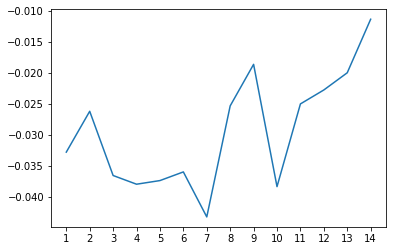

In [77]:
# 자체 그래프
plt.plot(c, a)
plt.xticks(c)
plt.show()

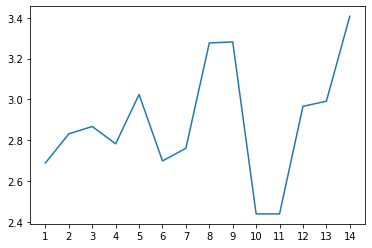

In [78]:
# 평점평균 그래프
plt.plot(c, b)
plt.xticks(c)
plt.show()

# 워드클라우드

In [49]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 156259 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [50]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truet

In [51]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)

plt.rc('font', family = font_name)
fm._rebuild()

NanumSquareRound


In [52]:
from wordcloud import WordCloud
from PIL import Image
from collections import Counter
import numpy as np

In [53]:
pos_list = df[df['score'] >= 4]
neg_list = df[df['score'] <= 3]

In [54]:
pos_reviews = ''
   
for i in pos_list['content'] : 
  pos_reviews = pos_reviews + i + '\n'

In [55]:
neg_reviews = ''
   
for i in neg_list['content'] : 
  neg_reviews = neg_reviews + i + '\n'

In [56]:
pos_token = okt.morphs(pos_reviews)
neg_token = okt.morphs(neg_reviews)

## good image

In [57]:
'''
ps_app
ps_function
ps_contents
ps_payment
ps_app + ps_function + ps_contents + ps_payment
'''

'\nps_app\nps_function\nps_contents\nps_payment\nps_app + ps_function + ps_contents + ps_payment\n'

In [58]:
pos_words = []
for i in pos_token : 
  if i in ps_contents  : # 긍정-부정 점수 차이가 가장 큰 분류를 넣으면 됨
    pos_words.append(i)

In [59]:
pos_c = Counter(pos_words)

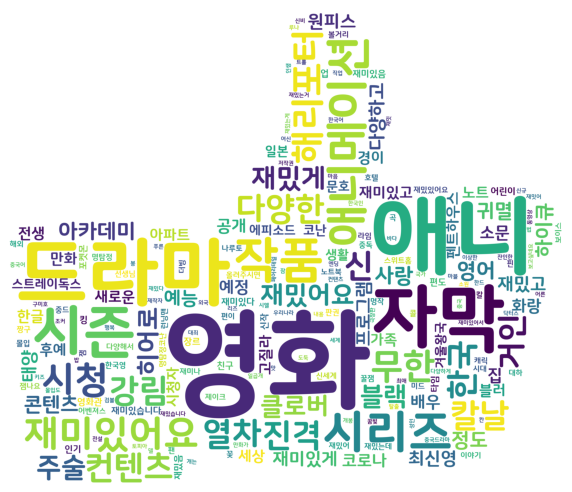

In [60]:
img = Image.open('/content/drive/MyDrive/good.png')
img_array = np.array(img)

wc = WordCloud(font_path=path, mask=img_array,background_color='white')
gen = wc.generate_from_frequencies(pos_c)

plt.figure(figsize=(10,12))
plt.axis("off")
plt.imshow(gen)

## bad image

In [61]:
'''
ng_app
ng_function
ng_contents
ng_payment
ng_function + ng_payment
ng_app + ng_function + ng_contents + ng_payment
'''

'\nng_app\nng_function\nng_contents\nng_payment\nng_function + ng_payment\nng_app + ng_function + ng_contents + ng_payment\n'

In [62]:
neg_words = []
for i in neg_token : 
  if i in ng_payment: # 긍정-부정 점수 차이가 가장 큰 분류를 넣으면 됨
    neg_words.append(i)

In [63]:
neg_c = Counter(neg_words)

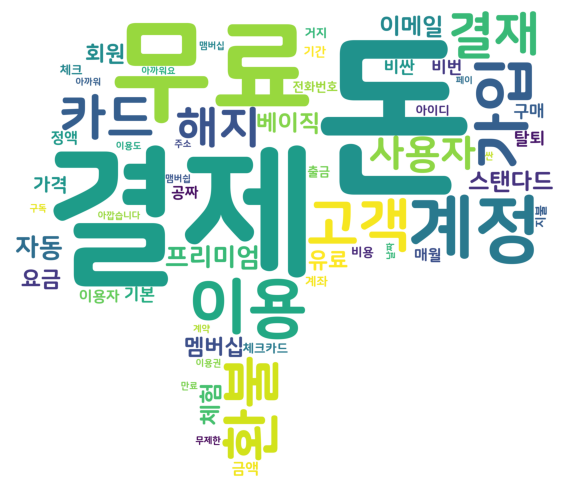

In [64]:
img = Image.open('/content/drive/MyDrive/bad.png')
img_array = np.array(img)

wc = WordCloud(font_path=path,mask=img_array,background_color='white')
gen = wc.generate_from_frequencies(neg_c)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(gen)